# Calculadora Spreads


In [237]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import norm
plt.style.use('ggplot')

In [7]:
def omega(r,t,sig,K,s):
    return (r*t + (sig**2)*(t/2) - np.log(K/s))/(sig*np.sqrt(t))

def C(s,t,K,sig,r):
    w = omega(r,t,sig,K,s)
    return s*norm.cdf(w) - K*np.exp(-r*t)*norm.cdf(w - sig*np.sqrt(t))

def P(s,t,K,sig,r):
    return C(s,t,K,sig,r)+K*np.exp(-r*t)-s

Descripción funciones

In [302]:
def bull(K1,K2,t,sigma,s,r,tipo):
    K_sell = max(K1,K2)
    K_buy = min(K1,K2)
    N = 100000
    S = np.linspace(0,2*min(K1,K2),1000)
    vp = np.exp(-r*t)
    if tipo == "call":
        cont=0
        C_sell = C(s,t,K_sell,sigma,r)
        C_buy = C(s,t,K_buy,sigma,r)
        for _ in range(N):
            Z = np.random.normal(0,1)
            W = r*t-(sigma**2)*(t/2) + sigma*np.sqrt(t)*Z
            St = s*np.exp(W)
            cont += St
        profit_max = vp*K_sell-vp*K_buy+C_sell-C_buy
        profit_min = C_sell-C_buy
        
        sell = S-K_sell
        sell[sell<0]=0
        sell = vp*sell
        Sell = C_sell-sell
        
        buy = S-K_buy
        buy[buy<0]=0
        buy = vp*buy
        Buy = buy-C_buy
        
        ST = cont/N
        profit_esperado =  -(vp)*max(ST-K_sell,0)+C_sell+(vp)*max(ST-K_buy,0)-C_buy
        
    if tipo == "put":
        cont=0
        C_sell = P(s,t,K_sell,sigma,r) 
        C_buy = P(s,t,K_buy,sigma,r)
        for _ in range(N):
            Z = np.random.normal(0,1)
            W = r*t-(sigma**2)*(t/2) + sigma*np.sqrt(t)*Z
            St = s*np.exp(W)
            cont += St
        profit_max = C_sell-C_buy
        profit_min = vp*K_buy-C_buy-vp*K_sell+C_sell
        
        sell = K_sell-S
        sell[sell<0]=0
        sell = vp*sell
        Sell = C_sell - sell
        
        buy = K_buy - S
        buy[buy<0]=0
        buy = vp*buy
        Buy = buy-C_buy
        
        ST = cont/N
        profit_esperado =  -(vp)*max(K_sell-ST,0)+C_sell+(vp)*max(K_buy-ST,0)-C_buy

    Pr = Sell+Buy

    
    
    #Output tabla
    tabla = [["Ganancia esperada",profit_esperado],
             ["Ganancia mínima",profit_min],
             ["Ganancia máxima", profit_max]]
    
    #Output gráfica 
    plt.scatter(ST,profit_esperado, label = "Ganancia esperada", color = "#fcba03", marker = "*",s = 150)
    plt.axhline(0,0,2*min(K1,K2),linewidth = 1, color = "white")
    plt.plot(S,Sell,linestyle = "dashed",linewidth = 1.2, label = "Opción vendida", color = "#52796f")
    plt.plot(S,Buy, linestyle = "dashed",linewidth = 1.2, label = "Opción comprada", color = "#e07a5f")
    plt.plot(S,Pr,linewidth = 1.8, label = "Ganancia", color = "#3d405b")
    plt.vlines(K_buy,-0.2,0.2,color =  "#e07a5f")
    plt.vlines(K_sell,-0.2,0.2,color = "#52796f")
    plt.text(K1,-0.7,'K1', color = "#787878",horizontalalignment='center')
    plt.text(K2,-0.7,'K2', color = "#787878",horizontalalignment='center')
    
    
    
    plt.grid(False)
    plt.xlabel("S(t)")
    plt.ylabel("Ganancia")
    plt.title("Ganancia estrategia bull "+tipo)
    plt.legend()
    plt.show()
    print("Ganancias estrategia bull "+tipo)
    return(tabulate(tabla))


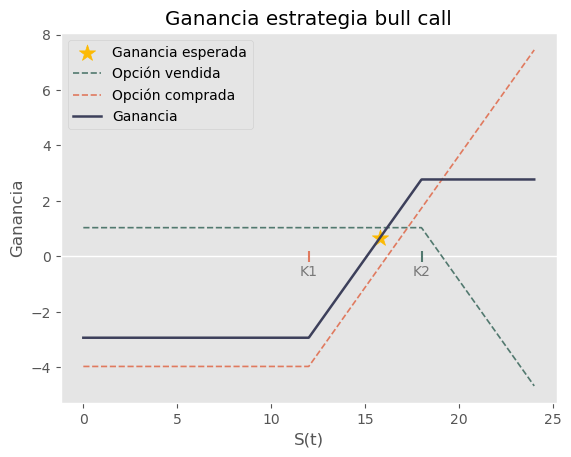

Ganancias estrategia bull call
-----------------  --------
Ganancia esperada   0.6556
Ganancia mínima    -2.93371
Ganancia máxima     2.77366
-----------------  --------


In [303]:
print(bull(12,18,1,0.3,15,0.05,"call"))

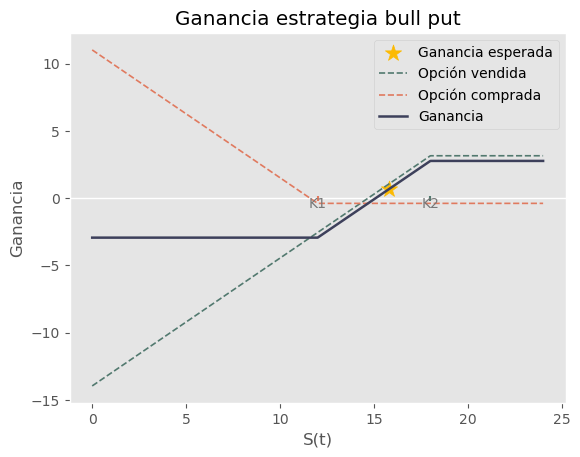

Ganancias estrategia bull put
-----------------  ---------
Ganancia esperada   0.674121
Ganancia mínima    -2.93371
Ganancia máxima     2.77366
-----------------  ---------


In [304]:
print(bull(12,18,1,0.3,15,0.05,"put"))

In [311]:
def bear(K1,K2,t,sigma,s,r,tipo):
    K_sell = min(K1,K2)
    K_buy = max(K1,K2)
    N = 100000
    S = np.linspace(0,2*min(K1,K2),1000)
    vp = np.exp(-r*t)
    if tipo == "call":
        cont=0
        C_sell = C(s,t,K_sell,sigma,r)
        C_buy = C(s,t,K_buy,sigma,r)
        for _ in range(N):
            Z = np.random.normal(0,1)
            W = r*t-(sigma**2)*(t/2) + sigma*np.sqrt(t)*Z
            St = s*np.exp(W)
            cont += St
        profit_max = C_sell-C_buy
        profit_min = vp*K_sell-vp*K_buy+C_sell-C_buy
        
        sell = S-K_sell
        sell[sell<0]=0
        sell = vp*sell
        Sell = C_sell-sell
        
        buy = S-K_buy
        buy[buy<0]=0
        buy = vp*buy
        Buy = buy-C_buy
        
        ST = cont/N
        profit_esperado =  -(vp)*max(ST-K_sell,0)+C_sell+(vp)*max(ST-K_buy,0)-C_buy
        
    if tipo == "put":
        cont=0
        C_sell = P(s,t,K_sell,sigma,r) 
        C_buy = P(s,t,K_buy,sigma,r)
        for _ in range(N):
            Z = np.random.normal(0,1)
            W = r*t-(sigma**2)*(t/2) + sigma*np.sqrt(t)*Z
            St = s*np.exp(W)
            cont += St
        profit_min = C_sell-C_buy
        profit_max = vp*K_buy-C_buy-vp*K_sell+C_sell
        
        sell = K_sell-S
        sell[sell<0]=0
        sell = vp*sell
        Sell = C_sell - sell
        
        buy = K_buy - S
        buy[buy<0]=0
        buy = vp*buy
        Buy = buy-C_buy
        
        ST = cont/N
        profit_esperado =  -(vp)*max(K_sell-ST,0)+C_sell+(vp)*max(K_buy-ST,0)-C_buy

    Pr = Sell+Buy

    
    
    #Output tabla
    tabla = [["Ganancia esperada",profit_esperado],
             ["Ganancia mínima",profit_min],
             ["Ganancia máxima", profit_max]]
    
    #Output gráfica 
    plt.scatter(ST,profit_esperado, label = "Ganancia esperada", color = "#fcba03", marker = "*",s = 150)
    plt.axhline(0,0,2*min(K1,K2),linewidth = 1, color = "white")
    plt.plot(S,Sell,linestyle = "dashed",linewidth = 1.2, label = "Opción vendida", color = "#52796f")
    plt.plot(S,Buy, linestyle = "dashed",linewidth = 1.2, label = "Opción comprada", color = "#e07a5f")
    plt.plot(S,Pr,linewidth = 1.8, label = "Ganancia", color = "#3d405b")
    plt.vlines(K_buy,-0.2,0.2,color =  "#e07a5f")
    plt.vlines(K_sell,-0.2,0.2,color = "#52796f")
    plt.text(K1,-0.7,'K1', color = "#787878",horizontalalignment='center')
    plt.text(K2,-0.7,'K2', color = "#787878",horizontalalignment='center')

    
    
    plt.grid(False)
    plt.xlabel("S(t)")
    plt.ylabel("Ganancia")
    plt.title("Ganancia estrategia bear "+tipo)
    plt.legend()
    plt.show()
    print("Ganancias estrategia bear "+tipo)
    return(tabulate(tabla))


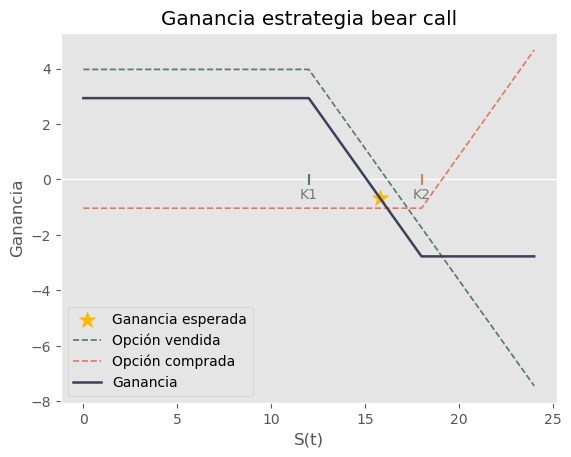

Ganancias estrategia bear call
-----------------  ---------
Ganancia esperada  -0.658547
Ganancia mínima    -2.77366
Ganancia máxima     2.93371
-----------------  ---------


In [312]:
print(bear(12,18,1,0.3,15,0.05,"call"))

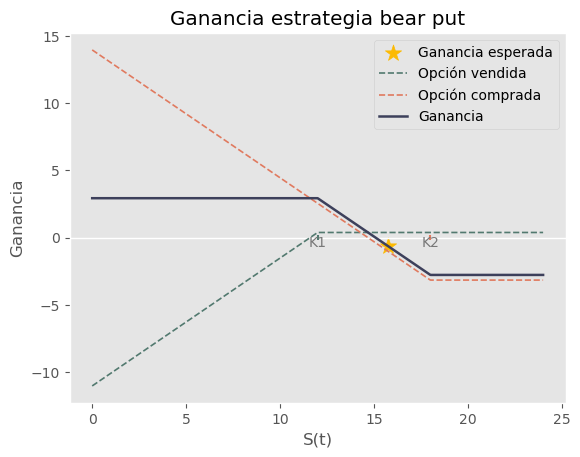

Ganancias estrategia bear put
-----------------  --------
Ganancia esperada  -0.65127
Ganancia mínima    -2.77366
Ganancia máxima     2.93371
-----------------  --------


In [313]:
print(bear(12,18,1,0.3,15,0.05,"put"))

In [74]:
def bull_interactivo():
    K1 = float(input("Precio de ejercicio opción 1:"))
    K2 = float(input("Precio de ejercicio opción 2:"))
    t = float(input("Duración opción:"))
    sigma = float(input("Volatilidad acción:"))
    s = float(input("Precio inicial acción:"))
    r = float(input("Tasa de rendimiento:"))
    tipo = str(input("Tipo de opción:"))
    print(bull(K1,K2,t,sigma,s,r,tipo))

Precio de ejercicio opción 1:12
Precio de ejercicio opción 2:10
Duración opción:1
Volatilidad acción:0.4
Precio inicial acción:11
Tasa de rendimiento:0.01
Tipo de opción:put


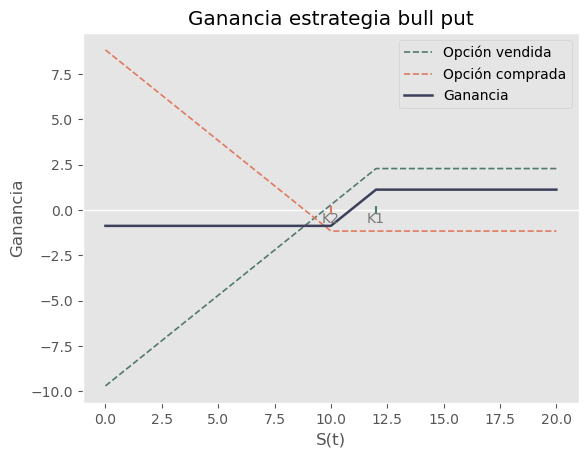

Ganancias estrategia bull put
-----------------  ------------
Ganancia esperada   0.000772305
Ganancia mínima    -0.876226
Ganancia máxima     1.12377
-----------------  ------------


In [78]:
bull_interactivo()

In [76]:
def bear_interactivo():
    K1 = float(input("Precio de ejercicio opción 1:"))
    K2 = float(input("Precio de ejercicio opción 2:"))
    t = float(input("Duración opción:"))
    sigma = float(input("Volatilidad acción:"))
    s = float(input("Precio inicial acción:"))
    r = float(input("Tasa de rendimiento:"))
    tipo = str(input("Tipo de opción:"))
    print(bear(K1,K2,t,sigma,s,r,tipo))

Precio de ejercicio opción 1:9
Precio de ejercicio opción 2:16
Duración opción:1
Volatilidad acción:0.1
Precio inicial acción:12
Tasa de rendimiento:0
Tipo de opción:put


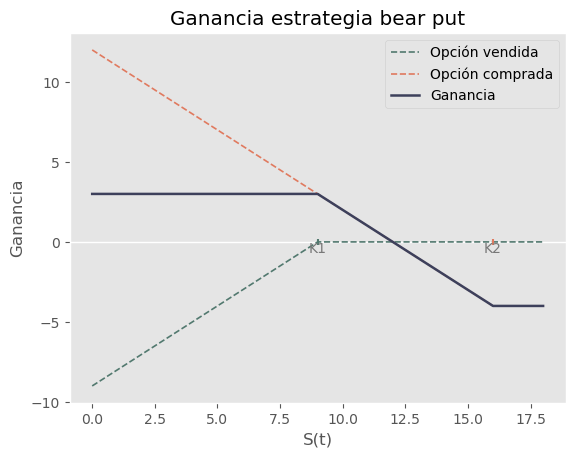

Ganancias estrategia bear put
-----------------  -----------
Ganancia esperada  -0.00292338
Ganancia mínima     2.9998
Ganancia máxima    -4.0002
-----------------  -----------


In [77]:
bear_interactivo()